## Thresholding, Binarization & Adaptive Thresholding


In thresholding, we convert a grey scale image to it's binary form

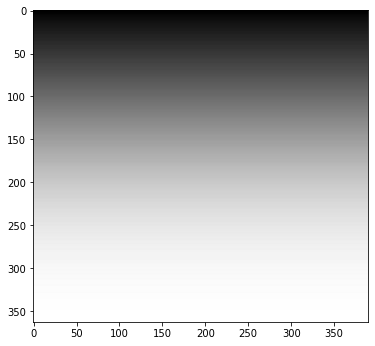

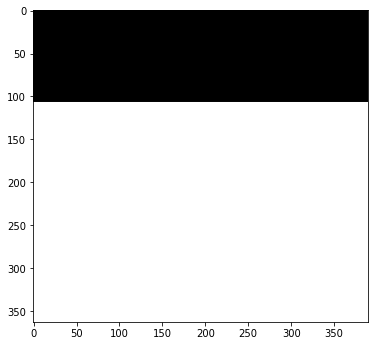

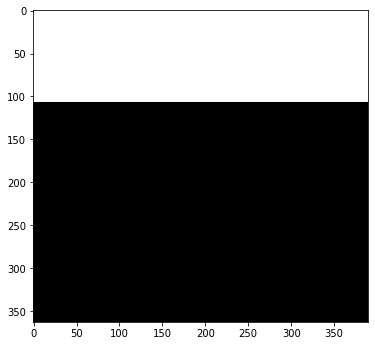

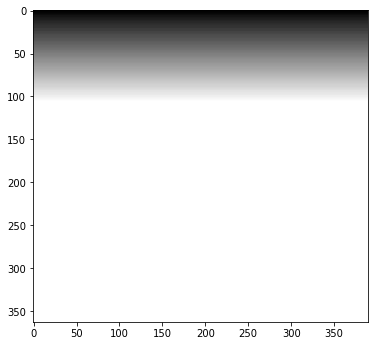

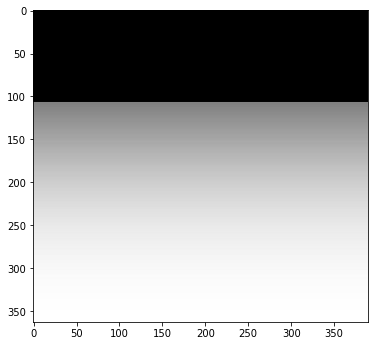

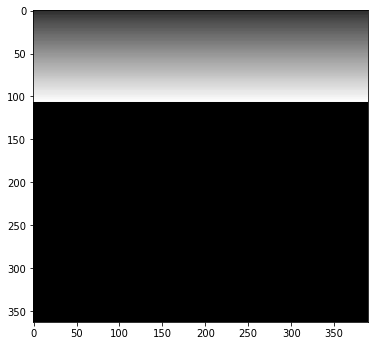

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load our image as greyscale 
image = cv2.imread('images/gradient.jpg',0)
plt.figure(figsize=(6, 19))
plt.imshow(image, cmap="gray")

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(6, 19))
plt.imshow(thresh1, cmap="gray")

# Values below 127 go to 255 and values above 127 go to 0 (reverse of above)
ret,thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
plt.figure(figsize=(6, 19))
plt.imshow(thresh2, cmap="gray")

# Values above 127 are truncated (held) at 127 (the 255 argument is unused)
ret,thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
plt.figure(figsize=(6, 19))
plt.imshow(thresh3, cmap="gray")

# Values below 127 go to 0, above 127 are unchanged  
ret,thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
plt.figure(figsize=(6, 19))
plt.imshow(thresh4, cmap="gray")

# Reverse of the above, below 127 is unchanged, above 127 goes to 0
ret,thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
plt.figure(figsize=(6, 19))
plt.imshow(thresh5, cmap="gray")



### Is there a better way off thresholding?

The biggest downfall of those simple threshold methods is that we need to provide the threshold value (i.e. the 127 value we used previously).
#### What if there was a smarter way of doing this?

There is with, Adaptive thresholding. 





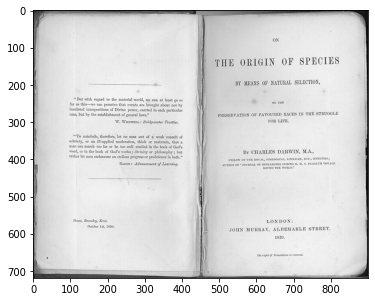

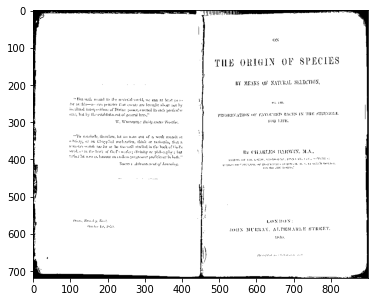

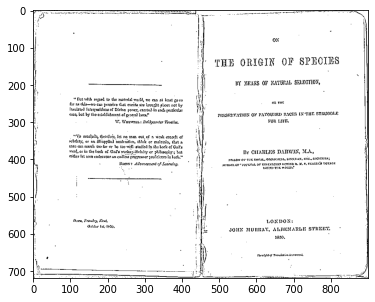

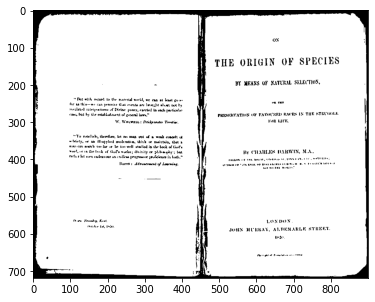

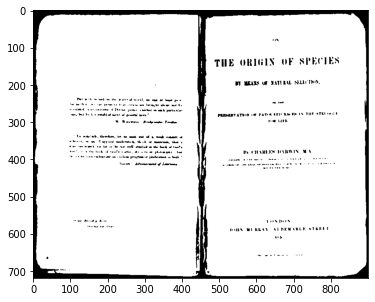

In [2]:
# Load our new image
image = cv2.imread('images/Origin_of_Species.jpg', 0)

plt.figure(figsize=(6, 19))
plt.imshow(image, cmap="gray")

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(6, 19))
plt.imshow(thresh1, cmap="gray")

# It's good practice to blur images as it removes noise
image = cv2.GaussianBlur(image, (3, 3), 0)

# Using adaptiveThreshold
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 
plt.figure(figsize=(6, 19))
plt.imshow(thresh, cmap="gray") 

_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.figure(figsize=(6, 19))
plt.imshow(th2, cmap="gray") 

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.figure(figsize=(6, 19))
plt.imshow(th3, cmap="gray") 


### cv2.adaptiveThreshold Parameters

**cv2.adaptiveThreshold**(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) → dst

- **src** – Source 8-bit single-channel image.
- **dst** – Destination image of the same size and the same type as src .
- **maxValue** – Non-zero value assigned to the pixels for which the condition is satisfied. See the details below.
- **adaptiveMethod** – Adaptive thresholding algorithm to use, ADAPTIVE_THRESH_MEAN_C or ADAPTIVE_THRESH_GAUSSIAN_C . See the details below.
- **thresholdType** – Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV .
- **blockSize** – Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.
- **C** – Constant subtracted from the mean or weighted mean. Normally, it is positive but may be zero or negative as well.